<a href="https://colab.research.google.com/github/Untick/Marketplaces/blob/Shishkin-Sergey-branch/Shishkin%20Sergey/%D0%9F%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%8B_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Проект**: Прогнозирование продаж товаров на маркетплейсах

**Построение таблицы корреляций осн.колонок рекламы/акций/показов/заказов (групп товаров или отдельных, весь период)**

---



# 1. Обработка базы данных

In [1]:
pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 2.5 MB/s eta 0:00:00


In [2]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import phik
import seaborn as sns; sns.set() #визуализация данных
from phik.report import plot_correlation_matrix
from phik import report

In [3]:
# Для загрузки данных используем drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Загрузка файла в colab
orders = pd.read_excel('/content/gdrive/MyDrive/Аналитика Акции 01.06.2022-31.05.2023.xlsx', sheet_name= 'Sheet1')
orders.head()

,Категория 3-го уровня,Товары,Модель,Ozon ID,Артикул,Акции,День,"Уникальные посетители, всего",Уникальные посетители с просмотром карточки товара,"Показы, всего",Показы на карточке товара,Показы в поиске и каталоге,Позиция в поиске и каталоге,"В корзину, всего",Заказано товаров,Доставлено (за выбранный период),Заказано на сумму,Заказано товаров по акции,Заказано на сумму по акции,"Отправления с премиум-подпиской, принятые в обработку"
0,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,NaN,2023-03-05,65,3,69,3,40,"110,33",0,0,0,0,0,0,0
1,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,NaN,2023-03-06,85,3,109,3,46,"103,43",0,0,0,0,0,0,0
2,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,NaN,2023-03-07,44,2,50,2,37,"97,14",0,0,0,0,0,0,0
3,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,NaN,2023-03-08,47,1,54,2,47,"115,06",0,0,0,0,0,0,0
4,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,NaN,2023-03-09,27,2,39,4,30,"114,37",0,0,0,0,0,0,0


In [5]:
# Общая информация
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239957 entries, 0 to 239956
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count   Dtype 
---  ------                                                 --------------   ----- 
 0   Категория 3-го уровня                                  239957 non-null  object
 1   Товары                                                 239957 non-null  object
 2   Модель                                                 200817 non-null  object
 3   Ozon ID                                                239957 non-null  int64 
 4   Артикул                                                239957 non-null  int64 
 5   Акции                                                  35605 non-null   object
 6   День                                                   239957 non-null  object
 7   Уникальные посетители, всего                           239957 non-null  int64 
 8   Уникальные посетители с просмотром карточки 

In [6]:
# удаляем не информативные колонки для выполнения поставленной задачи
orders.drop(['Модель', 'Отправления с премиум-подпиской, принятые в обработку', 'Доставлено (за выбранный период)'], axis=1, inplace=True)
orders.head()

,Категория 3-го уровня,Товары,Ozon ID,Артикул,Акции,День,"Уникальные посетители, всего",Уникальные посетители с просмотром карточки товара,"Показы, всего",Показы на карточке товара,Показы в поиске и каталоге,Позиция в поиске и каталоге,"В корзину, всего",Заказано товаров,Заказано на сумму,Заказано товаров по акции,Заказано на сумму по акции
0,Разное автопринадлежности,Светодиодная подсветка салона,882353427,34414,NaN,2023-03-05,65,3,69,3,40,"110,33",0,0,0,0,0
1,Разное автопринадлежности,Светодиодная подсветка салона,882353427,34414,NaN,2023-03-06,85,3,109,3,46,"103,43",0,0,0,0,0
2,Разное автопринадлежности,Светодиодная подсветка салона,882353427,34414,NaN,2023-03-07,44,2,50,2,37,"97,14",0,0,0,0,0
3,Разное автопринадлежности,Светодиодная подсветка салона,882353427,34414,NaN,2023-03-08,47,1,54,2,47,"115,06",0,0,0,0,0
4,Разное автопринадлежности,Светодиодная подсветка салона,882353427,34414,NaN,2023-03-09,27,2,39,4,30,"114,37",0,0,0,0,0


In [7]:
# Общая информация
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239957 entries, 0 to 239956
Data columns (total 17 columns):
 #   Column                                              Non-Null Count   Dtype 
---  ------                                              --------------   ----- 
 0   Категория 3-го уровня                               239957 non-null  object
 1   Товары                                              239957 non-null  object
 2   Ozon ID                                             239957 non-null  int64 
 3   Артикул                                             239957 non-null  int64 
 4   Акции                                               35605 non-null   object
 5   День                                                239957 non-null  object
 6   Уникальные посетители, всего                        239957 non-null  int64 
 7   Уникальные посетители с просмотром карточки товара  239957 non-null  int64 
 8   Показы, всего                                       239957 non-null  int64

In [8]:
# Меняем тип данных в колонке День на
orders['День'] = pd.to_datetime(orders['День'], format='%Y.%m.%d')

In [9]:
# Перевод данных столбца Позиция в поиске и каталоге в числовой формат datetime64
orders['Позиция в поиске и каталоге'] = orders['Позиция в поиске и каталоге'].str.replace(',','.').astype(float)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239957 entries, 0 to 239956
Data columns (total 17 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   Категория 3-го уровня                               239957 non-null  object        
 1   Товары                                              239957 non-null  object        
 2   Ozon ID                                             239957 non-null  int64         
 3   Артикул                                             239957 non-null  int64         
 4   Акции                                               35605 non-null   object        
 5   День                                                239957 non-null  datetime64[ns]
 6   Уникальные посетители, всего                        239957 non-null  int64         
 7   Уникальные посетители с просмотром карточки товара  239957 non-null  int64         

In [10]:
# Узнаем количество пропусков в ячейках
orders.isna().mean().sort_values(ascending=False)

Акции                                                 0.851619
Категория 3-го уровня                                 0.000000
Показы на карточке товара                             0.000000
Заказано товаров по акции                             0.000000
Заказано на сумму                                     0.000000
Заказано товаров                                      0.000000
В корзину, всего                                      0.000000
Позиция в поиске и каталоге                           0.000000
Показы в поиске и каталоге                            0.000000
Показы, всего                                         0.000000
Товары                                                0.000000
Уникальные посетители с просмотром карточки товара    0.000000
Уникальные посетители, всего                          0.000000
День                                                  0.000000
Артикул                                               0.000000
Ozon ID                                               0

In [11]:
# Столбец Акции важен для анализа, поэтому заполняем пустые ячейки нулями
orders['Акции'].fillna(0, inplace=True)
orders.isna().mean().sort_values(ascending=False)

Категория 3-го уровня                                 0.0
Показы на карточке товара                             0.0
Заказано товаров по акции                             0.0
Заказано на сумму                                     0.0
Заказано товаров                                      0.0
В корзину, всего                                      0.0
Позиция в поиске и каталоге                           0.0
Показы в поиске и каталоге                            0.0
Показы, всего                                         0.0
Товары                                                0.0
Уникальные посетители с просмотром карточки товара    0.0
Уникальные посетители, всего                          0.0
День                                                  0.0
Акции                                                 0.0
Артикул                                               0.0
Ozon ID                                               0.0
Заказано на сумму по акции                            0.0
dtype: float64

In [12]:
# Общая информация датафрейма
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239957 entries, 0 to 239956
Data columns (total 17 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   Категория 3-го уровня                               239957 non-null  object        
 1   Товары                                              239957 non-null  object        
 2   Ozon ID                                             239957 non-null  int64         
 3   Артикул                                             239957 non-null  int64         
 4   Акции                                               239957 non-null  object        
 5   День                                                239957 non-null  datetime64[ns]
 6   Уникальные посетители, всего                        239957 non-null  int64         
 7   Уникальные посетители с просмотром карточки товара  239957 non-null  int64         

In [13]:
# Переведем даты в индекс и удалим столбец Дата из таблицы
orders.index = pd.to_datetime(orders.День)
orders.drop('День', axis=1, inplace=True)
orders.head(10)

,Категория 3-го уровня,Товары,Ozon ID,Артикул,Акции,"Уникальные посетители, всего",Уникальные посетители с просмотром карточки товара,"Показы, всего",Показы на карточке товара,Показы в поиске и каталоге,Позиция в поиске и каталоге,"В корзину, всего",Заказано товаров,Заказано на сумму,Заказано товаров по акции,Заказано на сумму по акции
День,,,,,,,,,,,,,,,,
2023-03-05,Разное автопринадлежности,Светодиодная подсветка салона,882353427,34414,0,65,3,69,3,40,110.33,0,0,0,0,0
2023-03-06,Разное автопринадлежности,Светодиодная подсветка салона,882353427,34414,0,85,3,109,3,46,103.43,0,0,0,0,0
2023-03-07,Разное автопринадлежности,Светодиодная подсветка салона,882353427,34414,0,44,2,50,2,37,97.14,0,0,0,0,0
2023-03-08,Разное автопринадлежности,Светодиодная подсветка салона,882353427,34414,0,47,1,54,2,47,115.06,0,0,0,0,0
2023-03-09,Разное автопринадлежности,Светодиодная подсветка салона,882353427,34414,0,27,2,39,4,30,114.37,0,0,0,0,0
2023-03-10,Разное автопринадлежности,Светодиодная подсветка салона,882353427,34414,0,26,1,29,1,18,177.39,0,0,0,0,0
2023-03-11,Разное автопринадлежности,Светодиодная подсветка салона,882353427,34414,0,38,3,51,4,22,1028.14,0,0,0,0,0
2023-03-12,Разное автопринадлежности,Светодиодная подсветка салона,882353427,34414,0,41,1,48,1,15,247.67,0,0,0,0,0
2023-03-13,Разное автопринадлежности,Светодиодная подсветка салона,882353427,34414,0,50,2,60,3,27,407.04,0,0,0,0,0


In [14]:
# Выгружаем готовую базу в отдельный файл
orders.to_csv('orders_clear.csv', index=False)
orders_new = orders.copy()

# Матрица корреляций corr

<ipython-input-19-933b50c10486>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data=orders.corr(), annot=True, fmt='.2f', square=True, cmap='YlOrRd')


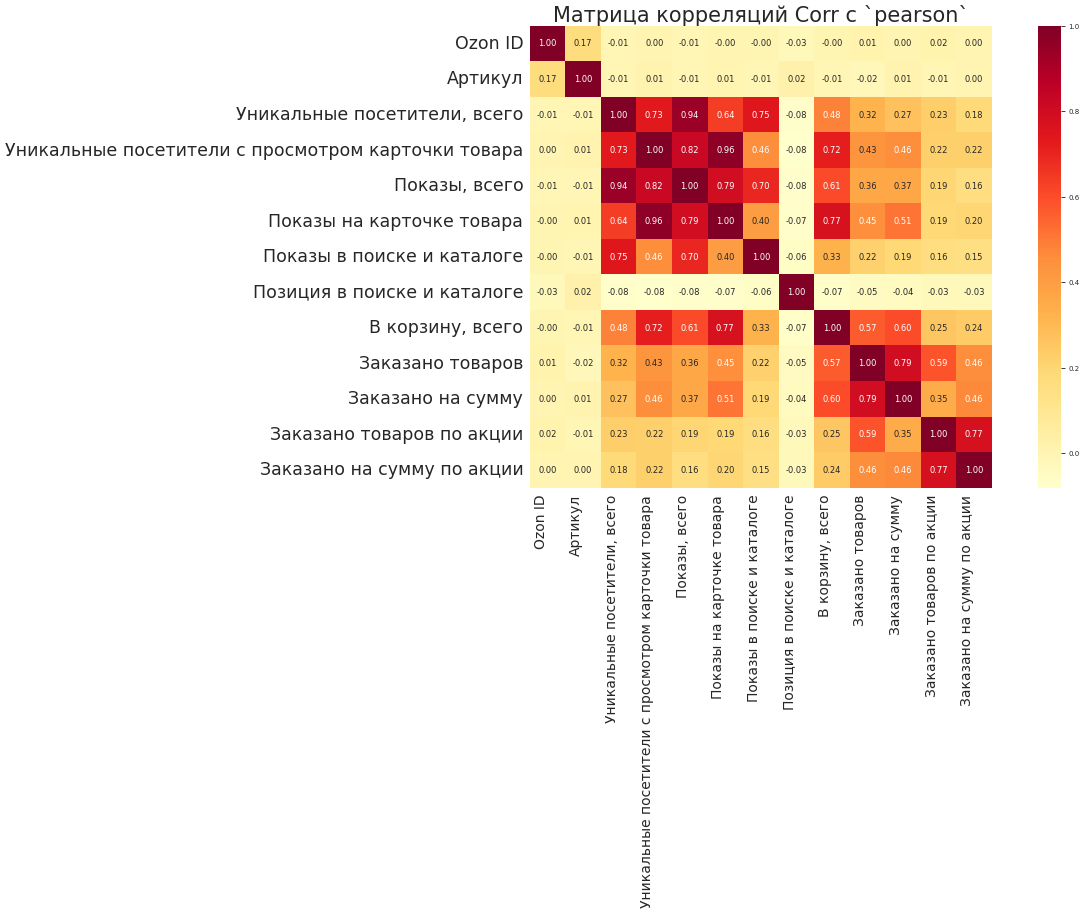

In [19]:
# Построим матрицу кореляций с методом `pearson`
plt.figure(figsize=(24, 12), dpi=50)
heatmap = sns.heatmap(data=orders.corr(), annot=True, fmt='.2f', square=True, cmap='YlOrRd')
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(rotation=90, ha='right', fontsize=20)
plt.yticks(rotation=0, fontsize=25)
plt.title('Матрица корреляций Corr с `pearson`', fontsize=30)
plt.show()

<ipython-input-17-126a8c62668f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data=orders.corr(method='kendall'), annot=True, fmt='.2f', square=True, cmap='YlOrRd')
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5278: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


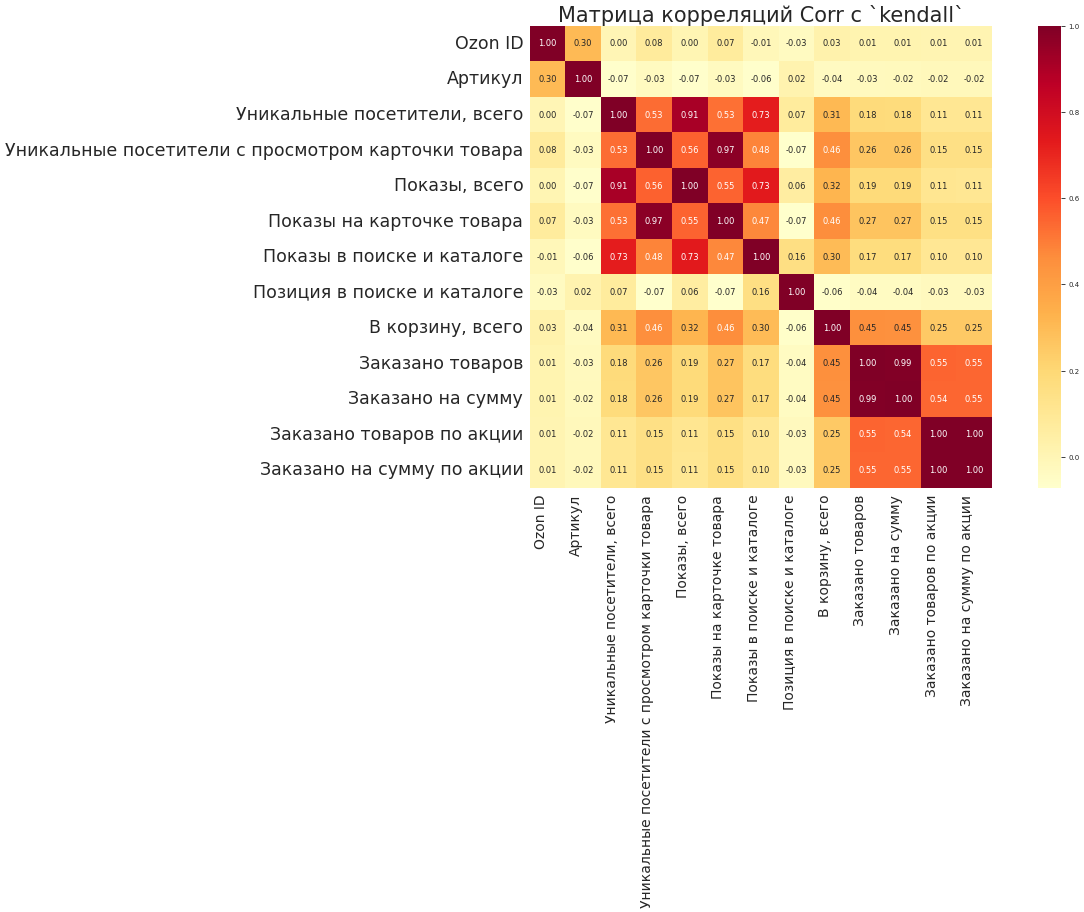

In [17]:
# Построим матрицу кореляций с методом `kendall`
plt.figure(figsize=(24, 12), dpi=50)
heatmap = sns.heatmap(data=orders.corr(method='kendall'), annot=True, fmt='.2f', square=True, cmap='YlOrRd')
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(rotation=90, ha='right', fontsize=20)
plt.yticks(rotation=0, fontsize=25)
plt.title('Матрица корреляций Corr с `kendall`', fontsize=30)
plt.show()

<ipython-input-18-bbe5bdc6ba5d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data=orders.corr(method='spearman'), annot=True, fmt='.2f', square=True, cmap='YlOrRd')


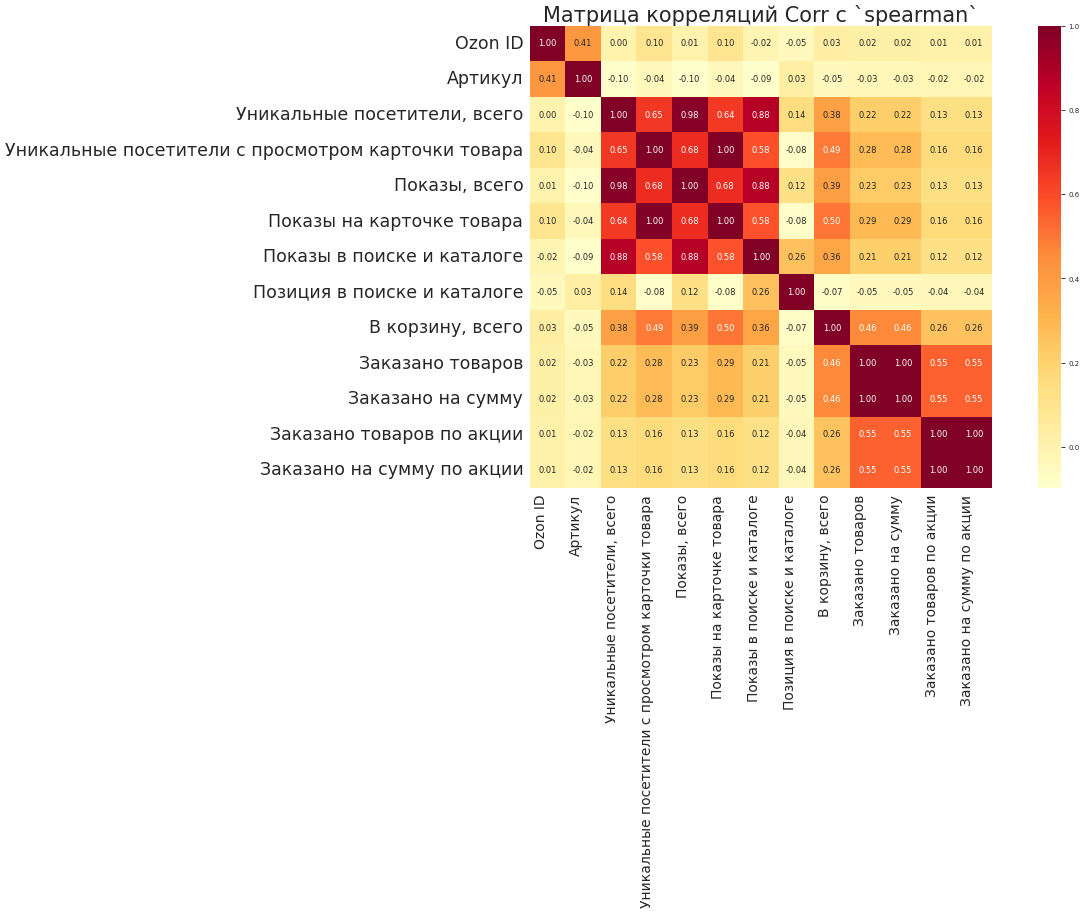

In [18]:
# Построим матрицу кореляций с методом `spearman`
plt.figure(figsize=(24, 12), dpi=50)
heatmap = sns.heatmap(data=orders.corr(method='spearman'), annot=True, fmt='.2f', square=True, cmap='YlOrRd')
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(rotation=90, ha='right', fontsize=20)
plt.yticks(rotation=0, fontsize=25)
plt.title('Матрица корреляций Corr с `spearman`', fontsize=30)
plt.show()

In [20]:
# Кореляция по категориям
list_cat = orders['Категория 3-го уровня'].unique()
print(list_cat)
print(len(list_cat))

['Разное автопринадлежности' 'Фара автомобильная' 'Лампа автомобильная'
 'Автохимия - Герметик, клей' 'Комплектующие для ксеноновых фар'
 'Фонарь задний для авто' 'Светодиодный модуль'
 'Комплектующие светодиодной лампы для авто' 'Другое']
9


<ipython-input-27-f3e412f95b90>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data=filtered.corr(), annot=True, fmt='.2f', square=True, cmap='YlOrRd')


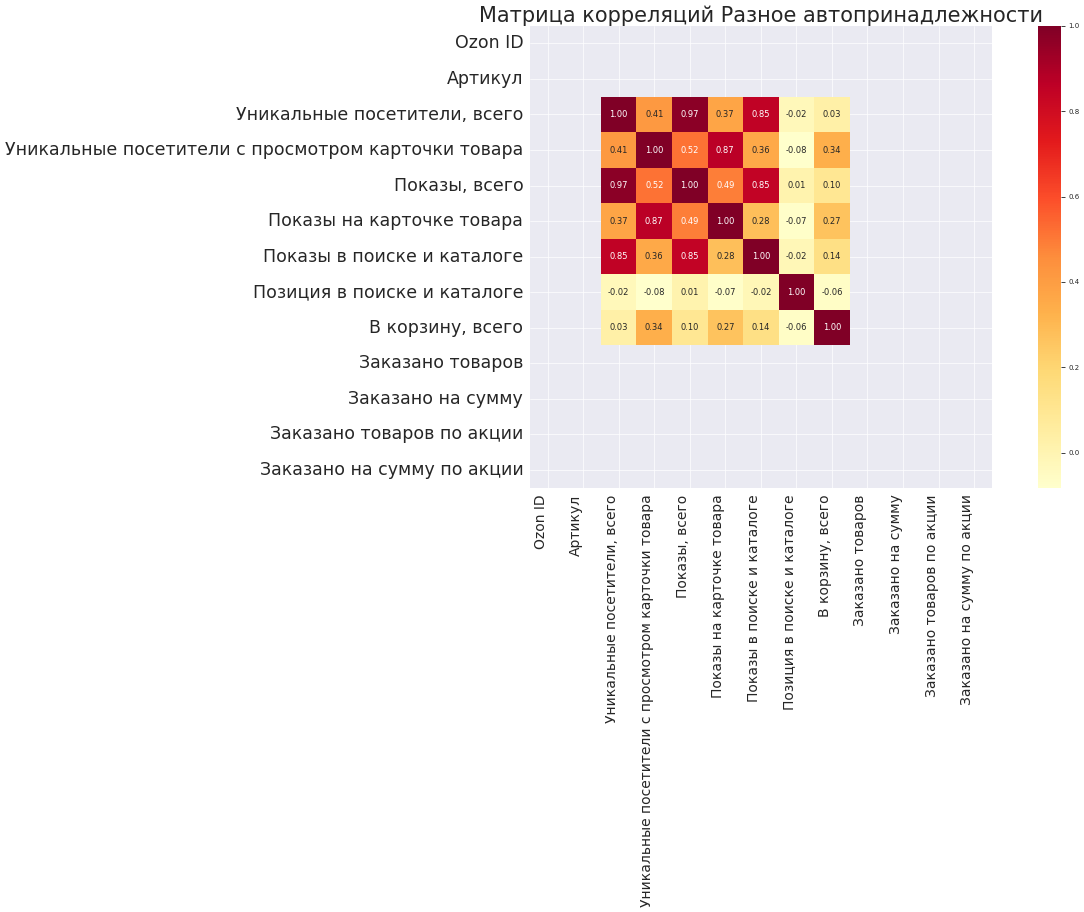

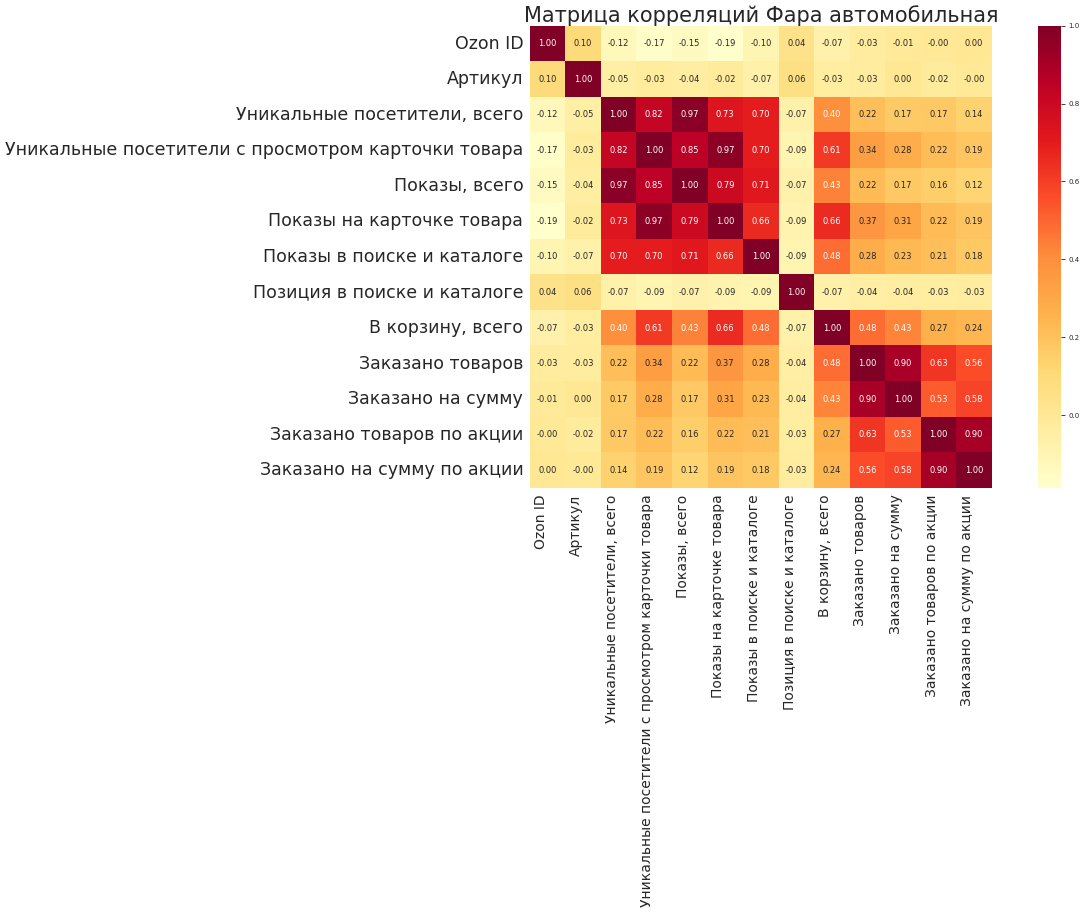

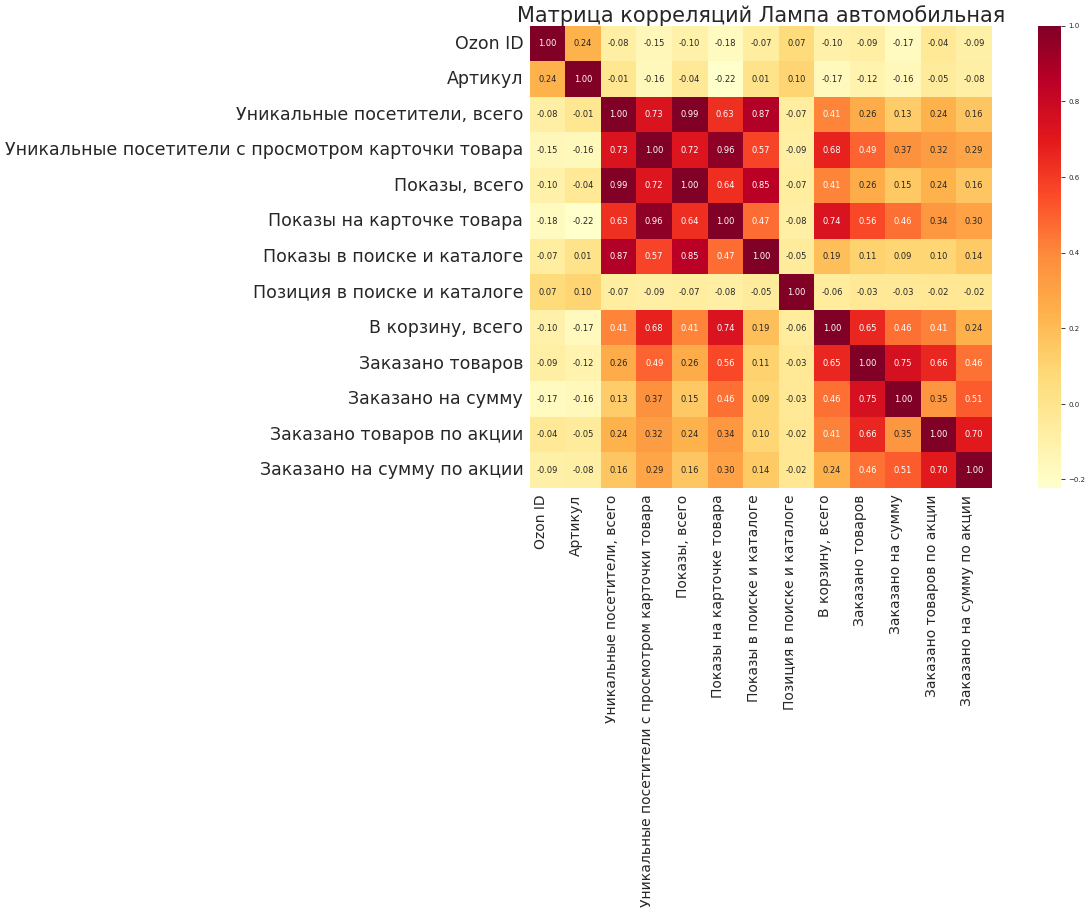

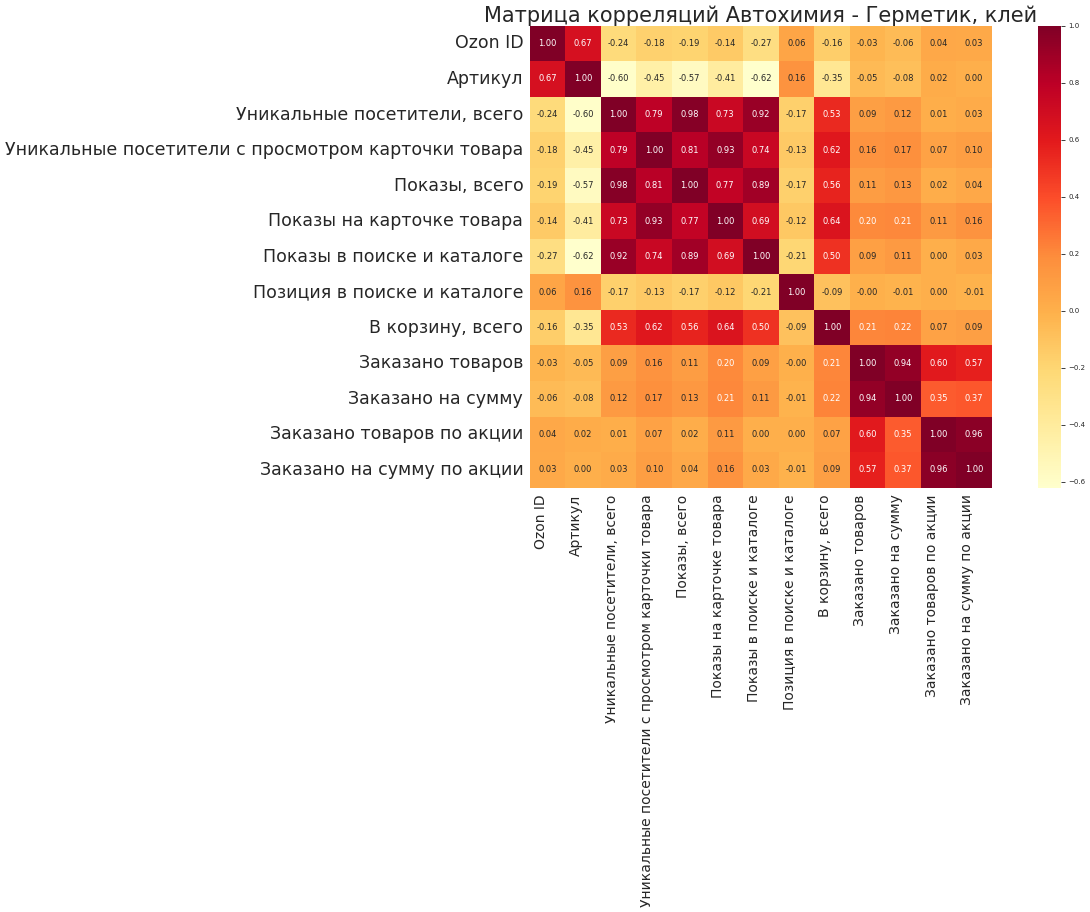

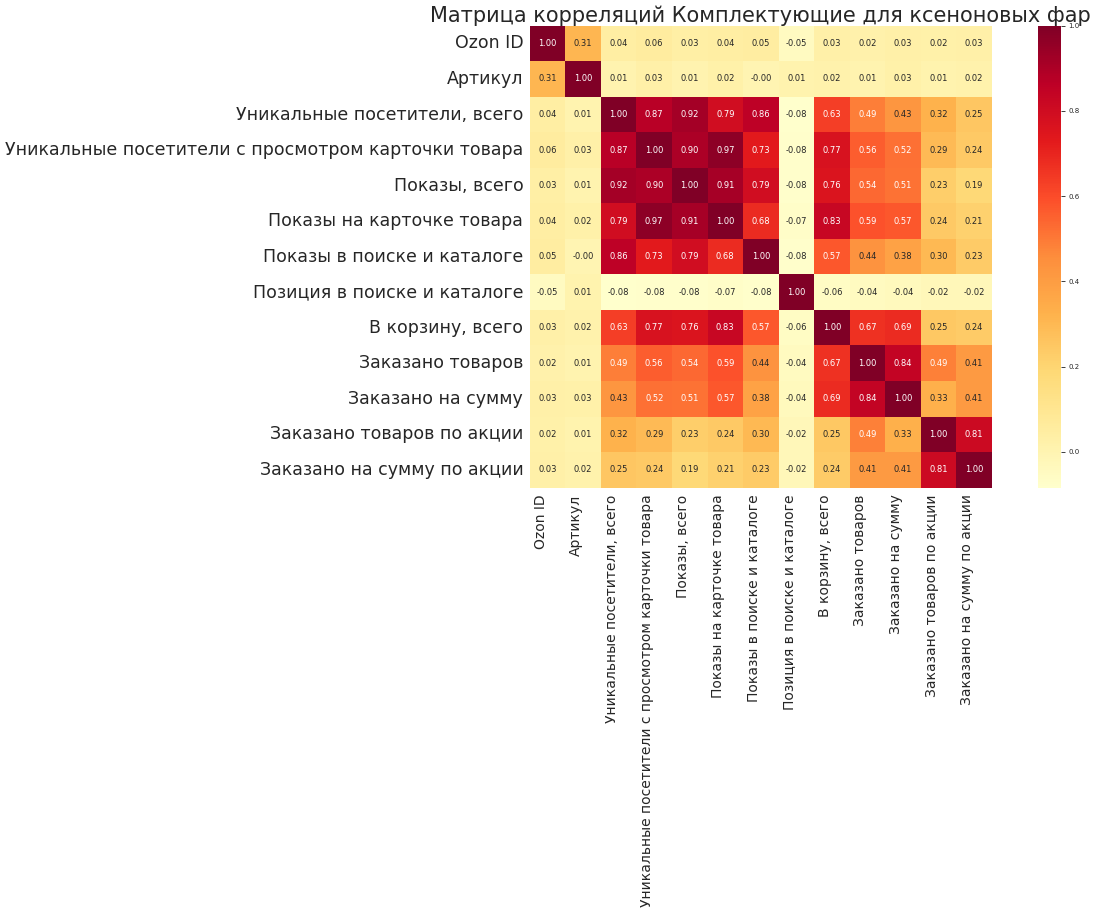

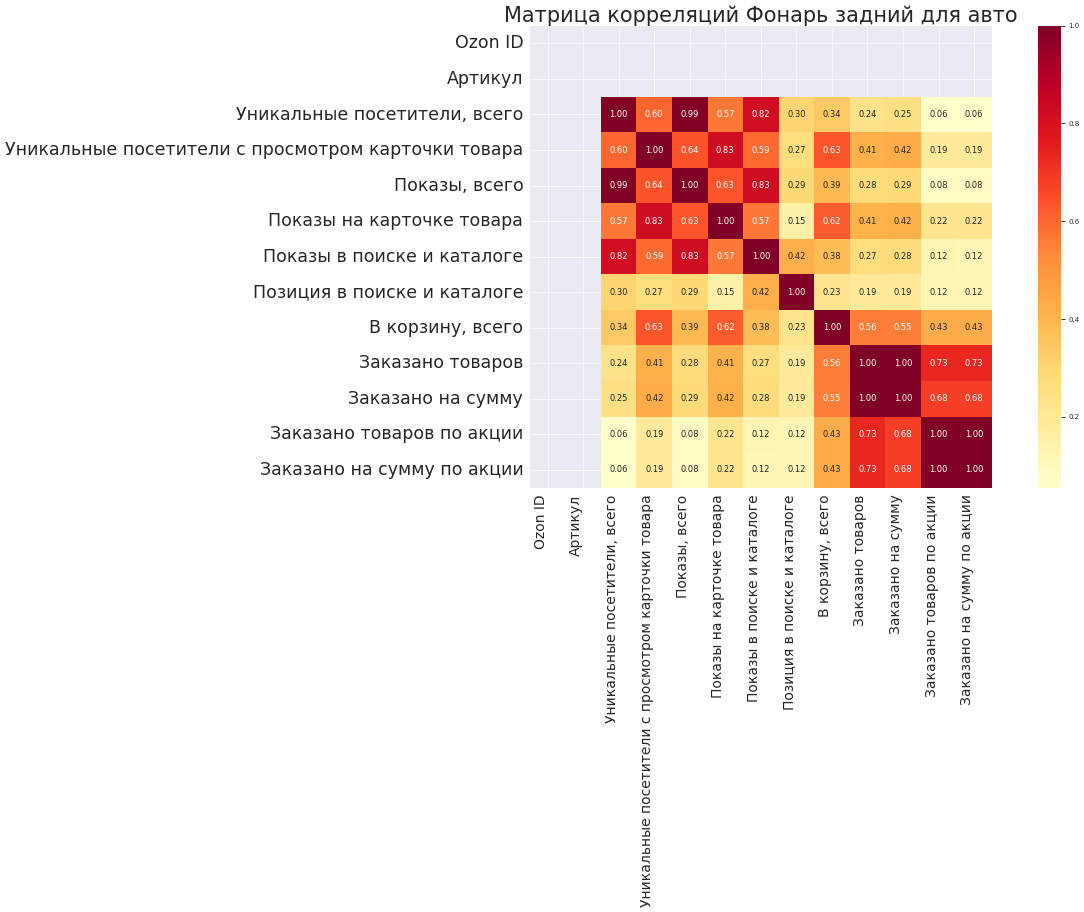

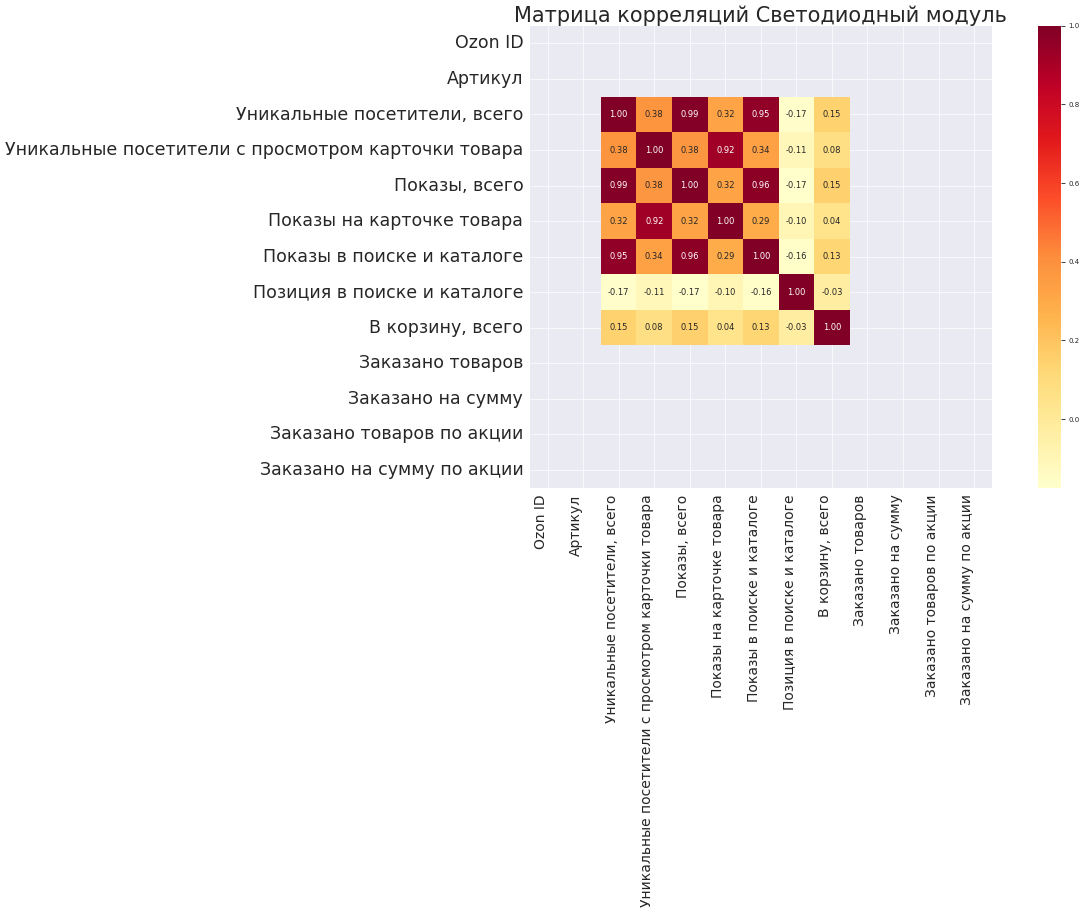

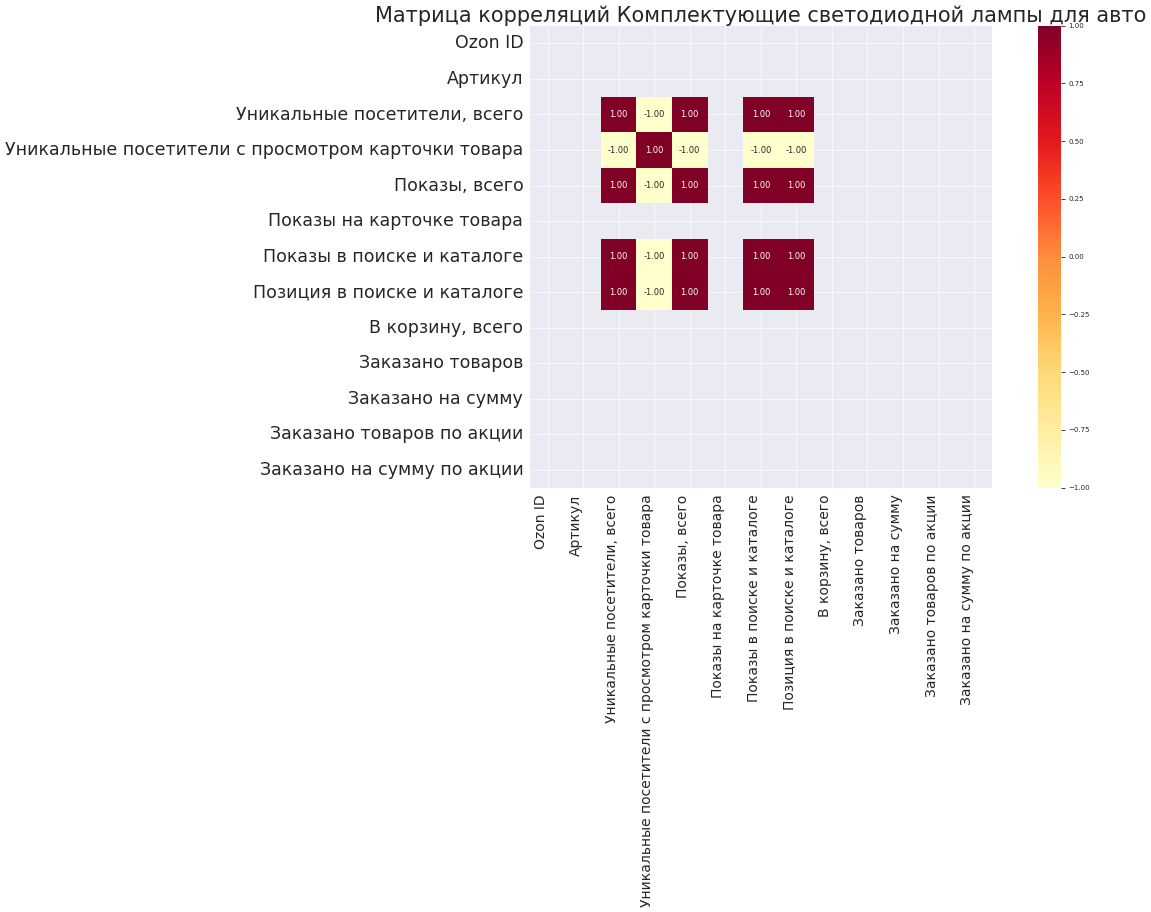

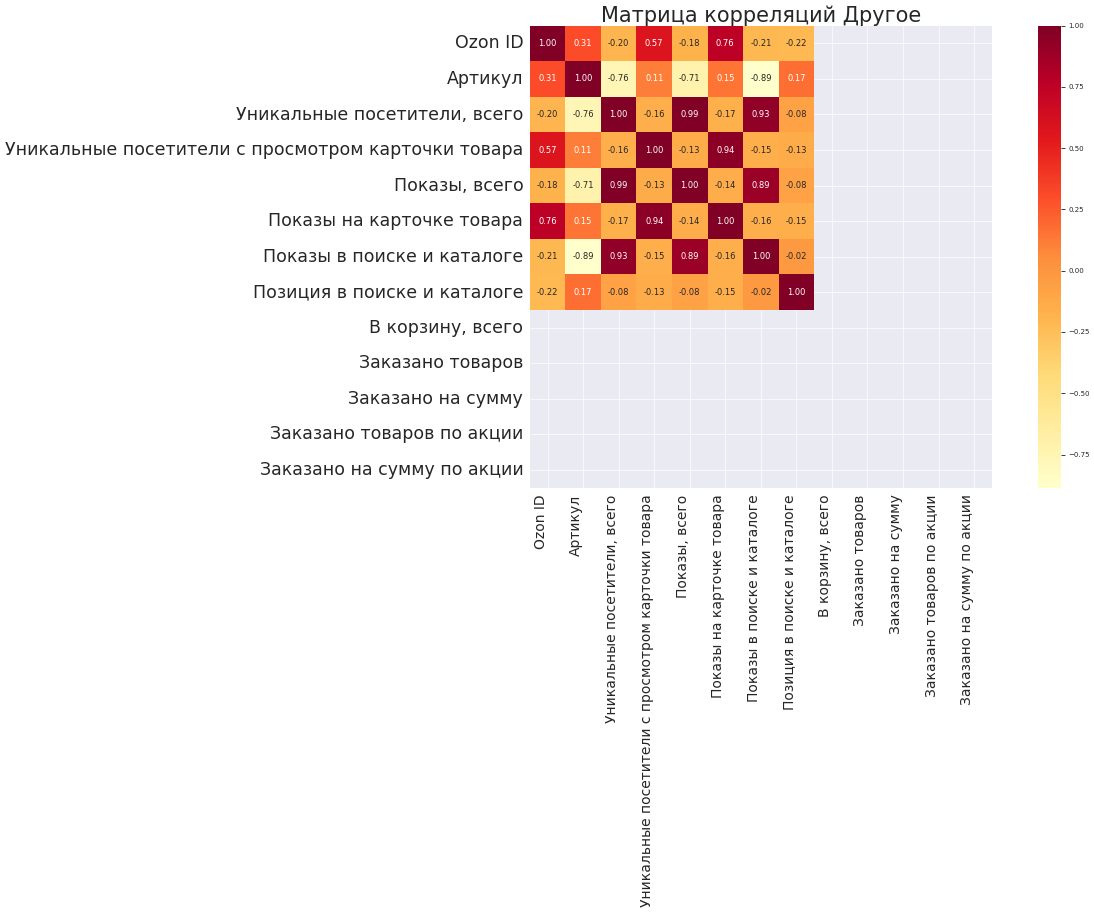

In [27]:
for i in orders['Категория 3-го уровня'].unique():
  filtered = orders[orders['Категория 3-го уровня'] == i]
  plt.figure(figsize=(24, 12), dpi=50)
  heatmap = sns.heatmap(data=filtered.corr(), annot=True, fmt='.2f', square=True, cmap='YlOrRd')
  cbar = heatmap.collections[0].colorbar
  cbar.ax.tick_params(labelsize=10)
  plt.xticks(rotation=90, ha='right', fontsize=20)
  plt.yticks(rotation=0, fontsize=25)
  plt.title('Матрица корреляций '+i , fontsize=30)
  plt.show()


In [21]:
list_cat = orders['Товары'].unique()
print(list_cat)
print(len(list_cat))

['Светодиодная подсветка салона'
 'Светодиодные линзы Aozoom A3+ RU (комплект)'
 'Светодиодные линзы Aozoom A7 (комплект)'
 'Стекло фары, GNX, левое, поликарбонат, для автомобилей Mercedes W218 CLS 2010-2014'
 'Стекло фары Volkswagen Touareg 2010-2014, левое, GNX, поликарбонат, для авто, автомобилей Фольксваген'
 'Переходная рамка Subaru Outback 4 2009-2014 для линз Hella 3R (ближний), GNX, для автомобилей Субару Аутбек'
 'Биксеноновая линза GNX Hella 3R Crystal Vision, газоразрядная, ксенон (HID), D1S, D2S, D3S, D4S'
 'Светодиодные линзы Bi-Led AOZOOM A3 Max 5500K 3.0" (2 шт.)'
 'Герметик для фар жесткий бутиловый черный (4 метра), GNX'
 'Линзы ксенон для фар Ford Focus 2 2007-2011 (CLEAR), GNX, для автомобилей Форд Фокус 2'
 'Стекло фары BMW X5 E70 2006-2013, правое, GNX, поликарбонат, для авто, автомобилей БМВ Х5'
 'Стекло фары BMW X5 E70 2006-2013, левое, GNX, поликарбонат, для авто, автомобилей БМВ Х5'
 'Переходная рамка Kia Ceed FL 10-12 для линз Hella 3R (рама на ближний и дальн

# Матрица корреляций